In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as smf

In [2]:
load_path = '/media/felix/Felixdrive/Analysis2025/Adhesion'
df = pd.read_csv(f'{load_path}/20250306_MF_counts_16_19_MM.csv')

# Base colors for "Direct" conditions
base_colors = {
    'Control': '#7c8083',  # Control group color
    'Infected': '#c53c37',  # Original Infected color
    'Uninfected': '#518fba'  # Original Uninfected color
}


In [3]:
# Calculate the mean MF count for uninfected samples for each Chip group
mean_uninfected = df[df['Infection Status'] == 'Uninfected'].groupby('Chip')['MF count'].mean()

# Calculate the relative MF count
df['Relative MF count'] = df.apply(
    lambda row: row['MF count'] / mean_uninfected[row['Chip']] if row['Chip'] in mean_uninfected else None, axis=1
)

df_FR = df[df['Chip'] != 'Marie']
# grop for chip and channel and get the mean
# Group by Chip and Channel and get the mean for both Relative MF count and MF count
df_FR_mean = df_FR.groupby(['Chip', 'Channel', 'Infection Status']).agg({'Relative MF count': 'mean', 'MF count': 'mean'}).reset_index()
df_FR_mean

,Chip,Channel,Infection Status,Relative MF count,MF count
0,16,2.0,Uninfected,1.034483,3.750000
1,16,3.0,Uninfected,0.965517,3.500000
2,16,8.0,Infected,1.310345,4.750000
3,16,9.0,Infected,1.379310,5.000000
4,16,13.0,Infected,1.172414,4.250000
5,19,2.0,Uninfected,0.888889,6.666667
6,19,3.0,Uninfected,1.033333,7.750000
7,19,4.0,Uninfected,0.766667,5.750000
8,19,7.0,Uninfected,1.022222,7.666667
9,19,8.0,Uninfected,1.266667,9.500000


/tmp/ipykernel_38831/2030318125.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR, ax=axes[1, 0], palette=base_colors, width=0.3)
/tmp/ipykernel_38831/2030318125.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Infection Status', y='MF count', data=df_FR, ax=axes[1, 1], palette=base_colors, width=0.3)


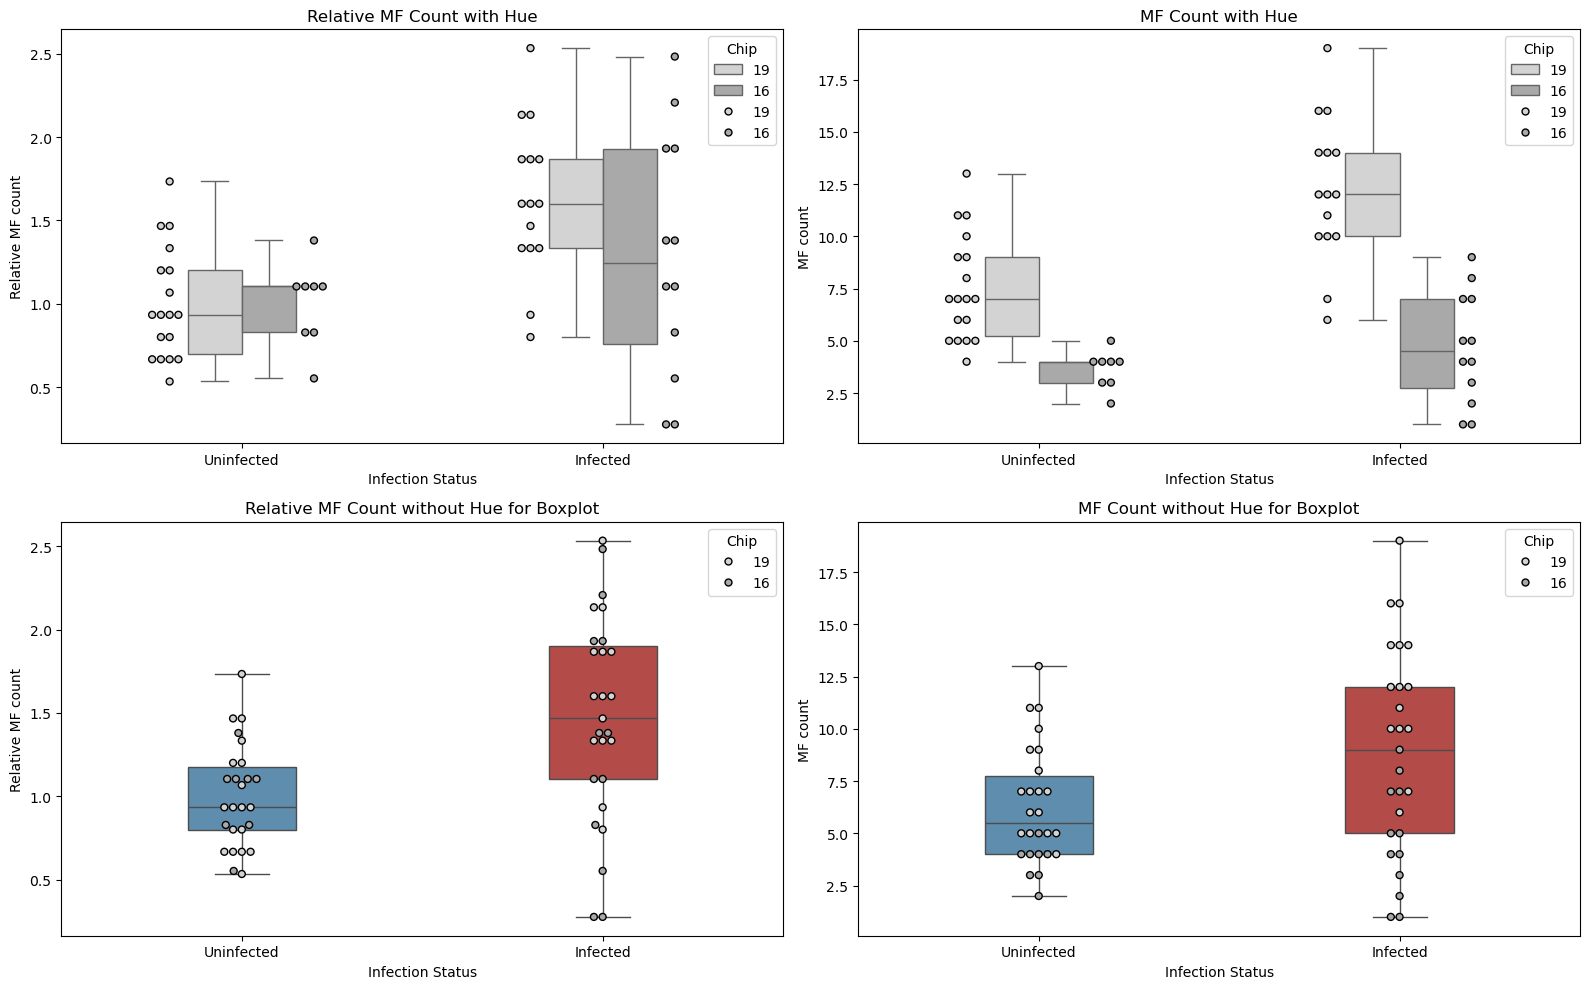

                 Relative MF count          
                              mean       std
Infection Status                            
Infected                  1.475862  0.611187
Uninfected                1.000000  0.308284
                  Relative MF count
Infection Status                   
Infected                   0.414122
Uninfected                 0.308284
                  MF count          
                      mean       std
Infection Status                    
Infected          8.851852  4.896653
Uninfected        6.307692  2.810968
                  MF count
Infection Status          
Infected          0.553178
Uninfected        0.445641


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Define gray colors for the swarmplot
gray_colors = ['#d3d3d3', '#a9a9a9']

# Plot relative MF count with hue
sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR, hue='Chip', dodge=True, palette=gray_colors, ax=axes[0, 0], width=0.3)
sns.swarmplot(x='Infection Status', y='Relative MF count', data=df_FR, size=5, hue='Chip', dodge=True, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[0, 0])
axes[0, 0].set_title('Relative MF Count with Hue')

# Plot MF count with hue
sns.boxplot(x='Infection Status', y='MF count', data=df_FR, hue='Chip', dodge=True, palette=gray_colors, ax=axes[0, 1], width=0.3)
sns.swarmplot(x='Infection Status', y='MF count', data=df_FR, size=5, hue='Chip', dodge=True, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[0, 1])
axes[0, 1].set_title('MF Count with Hue')

# Plot relative MF count without hue for boxplot
sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR, ax=axes[1, 0], palette=base_colors, width=0.3)
sns.swarmplot(x='Infection Status', y='Relative MF count', data=df_FR, size=5, hue='Chip', dodge=False, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[1, 0])
axes[1, 0].set_title('Relative MF Count without Hue for Boxplot')

# Plot MF count without hue for boxplot
sns.boxplot(x='Infection Status', y='MF count', data=df_FR, ax=axes[1, 1], palette=base_colors, width=0.3)
sns.swarmplot(x='Infection Status', y='MF count', data=df_FR, size=5, hue='Chip', dodge=False, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[1, 1])
axes[1, 1].set_title('MF Count without Hue for Boxplot')

plt.tight_layout()
plt.show()

# Print mean, std for relative MF count
print(df_FR.groupby('Infection Status').agg({'Relative MF count': ['mean', 'std']}))
# Print COV for relative MF count
print(df_FR.groupby('Infection Status').agg({'Relative MF count': 'std'}) / df_FR.groupby('Infection Status').agg({'Relative MF count': 'mean'}))

# Print mean, std for MF count
print(df_FR.groupby('Infection Status').agg({'MF count': ['mean', 'std']}))
# Print COV for MF count
print(df_FR.groupby('Infection Status').agg({'MF count': 'std'}) / df_FR.groupby('Infection Status').agg({'MF count': 'mean'}))


/tmp/ipykernel_38831/196193398.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, ax=axes[1, 0], palette=base_colors, width=0.3, whis=[0, 100])
/tmp/ipykernel_38831/196193398.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Infection Status', y='MF count', data=df_FR_mean, ax=axes[1, 1], palette=base_colors, width=0.3, whis=[0, 100])


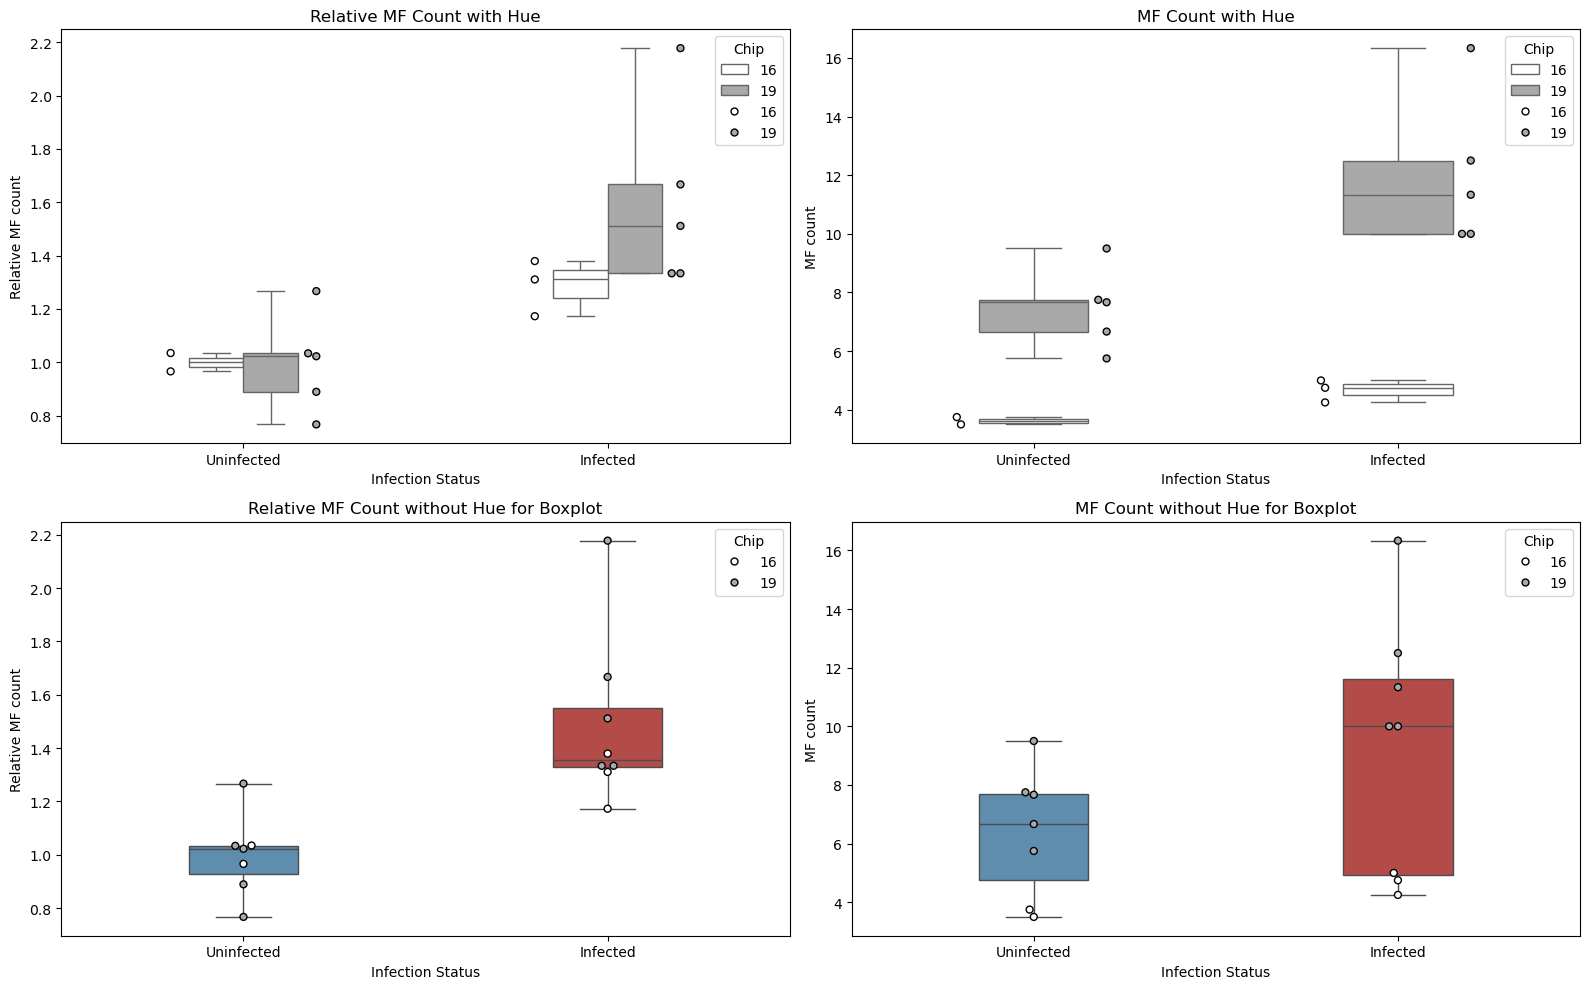

Relative MF count
Mean, std
                      Relative MF count          
                                   mean       std
Chip Infection Status                            
16   Infected                  1.287356  0.105347
     Uninfected                1.000000  0.048766
19   Infected                  1.604444  0.349391
     Uninfected                0.995556  0.186687
COV
                       Relative MF count
Chip Infection Status                   
16   Infected                   0.081832
     Uninfected                 0.048766
19   Infected                   0.217764
     Uninfected                 0.187520
Var
                       Relative MF count
Chip Infection Status                   
16   Infected                   0.011098
     Uninfected                 0.002378
19   Infected                   0.122074
     Uninfected                 0.034852
MF count
Mean, std
                        MF count          
                            mean       std
Chip Infection St

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Define gray colors for the swarmplot
gray_colors = ['white', '#a9a9a9']

# Plot relative MF count with hue
sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, hue='Chip', dodge=True, palette=gray_colors, ax=axes[0, 0], width=0.3, whis=[0, 100])
sns.swarmplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, size=5, hue='Chip', dodge=True, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[0, 0])
axes[0, 0].set_title('Relative MF Count with Hue')

# Plot MF count with hue
sns.boxplot(x='Infection Status', y='MF count', data=df_FR_mean, hue='Chip', dodge=False, palette=gray_colors, ax=axes[0, 1], width=0.3, whis=[0, 100])
sns.swarmplot(x='Infection Status', y='MF count', data=df_FR_mean, size=5, hue='Chip', dodge=True, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[0, 1])
axes[0, 1].set_title('MF Count with Hue')

# Plot relative MF count without hue for boxplot
sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, ax=axes[1, 0], palette=base_colors, width=0.3, whis=[0, 100])
sns.swarmplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, size=5, hue='Chip', dodge=False, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[1, 0])
axes[1, 0].set_title('Relative MF Count without Hue for Boxplot')

# Plot MF count without hue for boxplot
sns.boxplot(x='Infection Status', y='MF count', data=df_FR_mean, ax=axes[1, 1], palette=base_colors, width=0.3, whis=[0, 100])
sns.swarmplot(x='Infection Status', y='MF count', data=df_FR_mean, size=5, hue='Chip', dodge=False, palette=gray_colors, edgecolor='black', linewidth=1, ax=axes[1, 1])
axes[1, 1].set_title('MF Count without Hue for Boxplot')

plt.tight_layout()
plt.show()

# Print mean, std for relative MF count
print('Relative MF count')
print('Mean, std')
print(df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'Relative MF count': ['mean', 'std']}))
# Print COV for relative MF count
print('COV')
print(df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'Relative MF count': 'std'}) / df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'Relative MF count': 'mean'}))
# Print variance
print('Var')
print(df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'Relative MF count': 'var'}))

# Print mean, std for MF count
print('MF count')
print('Mean, std')
print(df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'MF count': ['mean', 'std']}))
# Print COV for MF count
print('COV')
print(df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'MF count': 'std'}) / df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'MF count': 'mean'}))
# Print variance
print('Var')
print(df_FR_mean.groupby(['Chip', 'Infection Status']).agg({'MF count': 'var'}))


/tmp/ipykernel_38831/1216580210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, palette=base_colors,  width=0.3, whis=[0, 100])


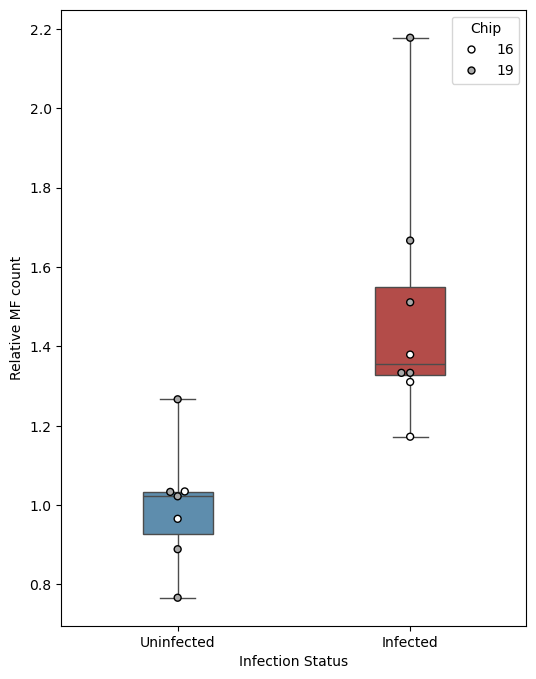

In [27]:
# Plot relative MF count without hue for boxplot
fig = plt.figure(figsize=(6, 8))
sns.boxplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, palette=base_colors,  width=0.3, whis=[0, 100])
sns.swarmplot(x='Infection Status', y='Relative MF count', data=df_FR_mean, size=5, hue='Chip', dodge=False, palette=gray_colors, edgecolor='black', linewidth=1)

# save as svg
plt.savefig(f'{load_path}/Relative_MF_count.svg', format='svg')


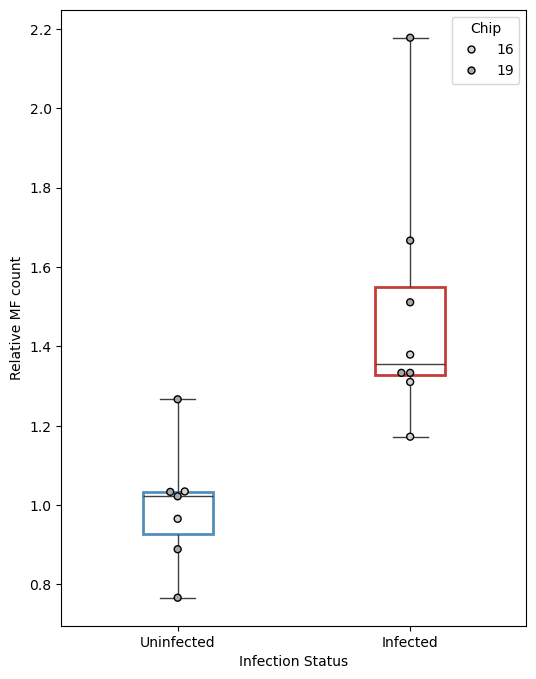

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Create boxplot with custom outline colors
sns.boxplot(
    x='Infection Status', y='Relative MF count', data=df_FR_mean,
    palette=None,  # Use base colors
    width=0.3, whis=[0, 100], ax=ax
)

# Modify box appearance to remove fill and keep the outline
for i, box in enumerate(ax.artists):
    status = df_FR_mean['Infection Status'].unique()[i]  # Get corresponding status
    box.set_edgecolor(base_colors[status])  # Set edge color based on palette
    box.set_linewidth(2)  # Adjust outline thickness
    box.set_facecolor('none')  # Make the box transparent inside

    # Modify box appearance to remove fill and keep the outline
for i, box in enumerate(ax.patches):
    status = df_FR_mean['Infection Status'].unique()[i]  # Get corresponding status
    box.set_edgecolor(base_colors[status])  # Set edge color based on palette
    box.set_linewidth(2)  # Adjust outline thickness
    box.set_facecolor('none')  # Make the box transparent inside

# Add swarm plot
sns.swarmplot(
    x='Infection Status', y='Relative MF count', data=df_FR_mean,
    size=5, hue='Chip', dodge=False, palette=gray_colors,
    edgecolor='black', linewidth=1, ax=ax
)

plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Separate the data into infected and uninfected groups
infected = df_FR_mean  [df_FR_mean['Infection Status'] == 'Infected']  ['MF count']
uninfected = df_FR_mean[df_FR_mean['Infection Status'] == 'Uninfected']['MF count']

# Perform the t-test
t_stat, p_value = ttest_ind(infected, uninfected)
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Determine if the null hypothesis can be rejected
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
# Perform the t-test for each chip
for chip in df_FR_mean['Chip'].unique():
    infected_chip   = df_FR_mean[(df_FR_mean['Infection Status'] == 'Infected')   & (df_FR_mean['Chip'] == chip)]['MF count']
    uninfected_chip = df_FR_mean[(df_FR_mean['Infection Status'] == 'Uninfected') & (df_FR_mean['Chip'] == chip)]['MF count']
    
    if len(infected_chip) > 0 and len(uninfected_chip) > 0:
        t_stat_chip, p_value_chip = ttest_ind(infected_chip, uninfected_chip)
        print('---------------------------------')
        print(f'Chip: {chip}')
        print('t-statistic:', t_stat_chip)
        print('p-value:', p_value_chip)
        
        if p_value_chip < 0.05:
            print('Reject the null hypothesis')
        else:
            print('Fail to reject the null hypothesis')

t-statistic: 1.6058918763314072
p-value: 0.1323044804742581
Fail to reject the null hypothesis
---------------------------------
Chip: 16
t-statistic: 3.478041718201263
p-value: 0.04011205446339325
Reject the null hypothesis
---------------------------------
Chip: 19
t-statistic: 3.4369696828826144
p-value: 0.008863299801391155
Reject the null hypothesis


In [11]:
# rename columns ' ' to '_'
df_FR_mean.columns = [col.replace(' ', '_') for col in df_FR_mean.columns]
# Mixed Effects Model: MF_count ~ Infection_Status + (1|Chip)
model = smf.mixedlm("MF_count ~ Infection_Status", data=df_FR_mean, groups=df_FR_mean["Chip"], re_formula="1")
result = model.fit()

# Ergebnisse ausgeben
print(result.summary())
# print p-values
print(result.pvalues)

# Reverse column names to original
df_FR_mean.columns = [col.replace('_', ' ') for col in df_FR_mean.columns]


                  Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       MF_count
No. Observations:        15            Method:                   REML    
No. Groups:              2             Scale:                    3.8088  
Min. group size:         5             Log-Likelihood:           -30.8455
Max. group size:         10            Converged:                Yes     
Mean group size:         7.5                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       8.565    2.956  2.897 0.004  2.771 14.359
Infection_Status[T.Uninfected] -3.406    1.015 -3.356 0.001 -5.395 -1.417
Group Var                      16.490   12.871                           

Intercept                         0.003764
Infection_St

In [16]:
from scipy.stats import ttest_ind

# Separate the data into infected and uninfected groups
infected = df_FR_mean[df_FR_mean['Infection Status'] == 'Infected']['Relative MF count']
uninfected = df_FR_mean[df_FR_mean['Infection Status'] == 'Uninfected']['Relative MF count']

# Perform the t-test
t_stat, p_value = ttest_ind(infected, uninfected)
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Determine if the null hypothesis can be rejected
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
# Perform the t-test for each chip
for chip in df_FR_mean['Chip'].unique():
    infected_chip = df_FR_mean[(df_FR_mean['Infection Status'] == 'Infected') & (df_FR_mean['Chip'] == chip)]['Relative MF count']
    uninfected_chip = df_FR_mean[(df_FR_mean['Infection Status'] == 'Uninfected') & (df_FR_mean['Chip'] == chip)]['Relative MF count']
    
    if len(infected_chip) > 0 and len(uninfected_chip) > 0:
        t_stat_chip, p_value_chip = ttest_ind(infected_chip, uninfected_chip)
        print('---------------------------------')
        print(f'Chip: {chip}')
        print('t-statistic:', t_stat_chip)
        print('p-value:', p_value_chip)
        
        if p_value_chip < 0.05:
            print('Reject the null hypothesis')
        else:
            print('Fail to reject the null hypothesis')


t-statistic: 3.7129467904992777
p-value: 0.002604960319757532
Reject the null hypothesis
---------------------------------
Chip: 16
t-statistic: 3.4780417182012626
p-value: 0.040112054463393276
Reject the null hypothesis
---------------------------------
Chip: 19
t-statistic: 3.436969682882612
p-value: 0.00886329980139118
Reject the null hypothesis


In [10]:
# rename columns ' ' to '_'
df_FR_mean.columns = [col.replace(' ', '_') for col in df_FR_mean.columns]
# Mixed Effects Model: MF_count ~ Infection_Status + (1|Chip)
model = smf.mixedlm("Relative_MF_count ~ Infection_Status", data=df_FR_mean, groups=df_FR_mean["Chip"], re_formula="1")
result = model.fit()

# Reverse column names to original
df_FR_mean.columns = [col.replace('_', ' ') for col in df_FR_mean.columns]
# Ergebnisse ausgeben
print(result.summary())
# print p value
print(result.pvalues)

                  Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Relative_MF_count
No. Observations:     15         Method:                REML             
No. Groups:           2          Scale:                 0.0613           
Min. group size:      5          Log-Likelihood:        -2.5829          
Max. group size:      10         Converged:             Yes              
Mean group size:      7.5                                                
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       1.476    0.107 13.803 0.000  1.267  1.686
Infection_Status[T.Uninfected] -0.495    0.129 -3.835 0.000 -0.748 -0.242
Group Var                       0.007    0.094                           

Intercept                         2.445856e-43
Infectio

/home/felix/miniconda3/envs/statenv/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
